# MNIST vs Fashion MNIST

# Visualization of Datasets

100%|██████████| 9.91M/9.91M [00:00<00:00, 11.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.78MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 13.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.76MB/s]
100%|██████████| 26.4M/26.4M [00:01<00:00, 19.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 304kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.53MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 3.01MB/s]


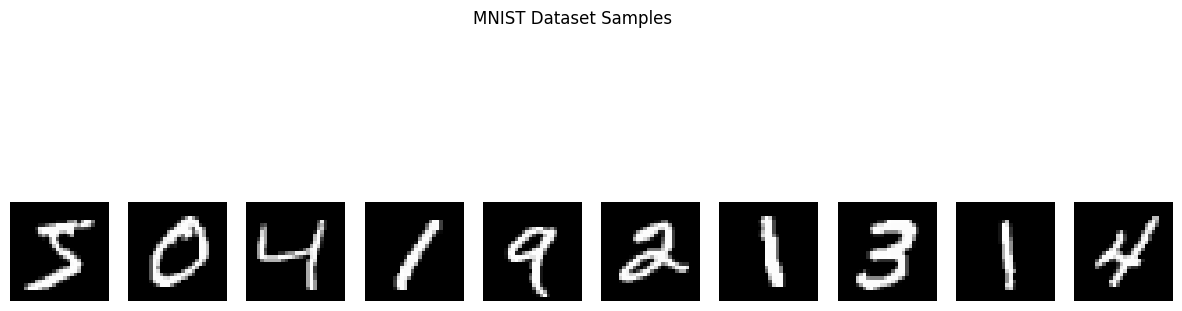

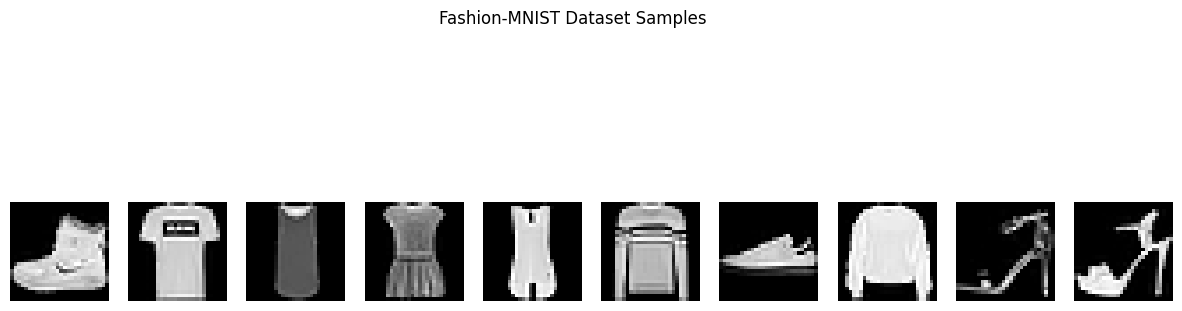

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([transforms.ToTensor()])

# Load datasets
mnist = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
fashion_mnist = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)

# Function to visualize dataset samples
def visualize_samples(dataset, title, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        image, label = dataset[i]
        axes[i].imshow(image.squeeze(), cmap="gray")
        axes[i].axis("off")
    plt.suptitle(title)
    plt.show()

# Visualize MNIST
visualize_samples(mnist, "MNIST Dataset Samples")

# Visualize Fashion-MNIST
visualize_samples(fashion_mnist, "Fashion-MNIST Dataset Samples")


# Training of MLP on MNIST and Fashion MNIST

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
mnist_train = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# Load Fashion-MNIST dataset
fashion_train = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
fashion_test = torchvision.datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

fashion_train_loader = torch.utils.data.DataLoader(fashion_train, batch_size=batch_size, shuffle=True)
fashion_test_loader = torch.utils.data.DataLoader(fashion_test, batch_size=batch_size, shuffle=False)


# MLP Model

In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model_mnist = MLP()
model_fashion = MLP()


# Training the Model

In [4]:
def train_model(model, train_loader, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Train MNIST model
print("Training MNIST Model...")
train_model(model_mnist, mnist_train_loader)

# Train Fashion-MNIST model
print("Training Fashion-MNIST Model...")
train_model(model_fashion, fashion_train_loader)


Training MNIST Model...
Epoch 1, Loss: 276.9301
Epoch 2, Loss: 127.3937
Epoch 3, Loss: 95.4413
Epoch 4, Loss: 77.1586
Epoch 5, Loss: 66.6906
Training Fashion-MNIST Model...
Epoch 1, Loss: 455.3834
Epoch 2, Loss: 343.9039
Epoch 3, Loss: 305.2000
Epoch 4, Loss: 279.9636
Epoch 5, Loss: 264.7698


# Evaluating the Models

In [5]:
def evaluate_model(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            predicted = torch.argmax(output, dim=1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return accuracy

# Evaluate MNIST model
mnist_accuracy = evaluate_model(model_mnist, mnist_test_loader)
print(f"MNIST Test Accuracy: {mnist_accuracy:.4f}")

# Evaluate Fashion-MNIST model
fashion_accuracy = evaluate_model(model_fashion, fashion_test_loader)
print(f"Fashion-MNIST Test Accuracy: {fashion_accuracy:.4f}")


MNIST Test Accuracy: 0.9728
Fashion-MNIST Test Accuracy: 0.8750


# Comparison

1. MNIST Accuracy = ~98%
2. Fashion MNIST Accuracy = ~ 88%



*   MNIST is easier to classify due to distinct digit shapes.
*   Fashion-MNIST is more challenging due to variations in clothing styles

